<a href="https://colab.research.google.com/github/budhathoki10/Concept_and_Technology_of_AI/blob/master/worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Problem 1 - Data Read, Write and Inspect:
• Dataset for the Task: "bank.csv"

In [5]:
#1. Load the provided dataset and import in pandas DataFrame.
df=pd.read_csv("/content/drive/MyDrive/bank.csv")

#2. Check info of the DataFrame and identify following:
# df.head()
# df.tail()
# df.info()

#a
print("Columns with dtype = object:")
object_cols = df.select_dtypes(include='object').columns
print(object_cols)
#b
for col in object_cols:
    print(f" \n unique in column {col}: ")
    print(df[col].unique())
#c
total_val= df.isnull().sum();
print(total_val)

#3
drop_column= df.drop(columns=object_cols)
drop_column.to_csv("banknumericdata.csv",index=True)
print("sucessfully written")


#4
new_csv= pd.read_csv("/content/banknumericdata.csv")
print(new_csv.describe())

Columns with dtype = object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
 
 unique in column job: 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
 
 unique in column marital: 
['married' 'single' 'divorced']
 
 unique in column education: 
['tertiary' 'secondary' 'unknown' 'primary']
 
 unique in column default: 
['no' 'yes']
 
 unique in column housing: 
['yes' 'no']
 
 unique in column loan: 
['no' 'yes']
 
 unique in column contact: 
['unknown' 'cellular' 'telephone']
 
 unique in column month: 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
 
 unique in column poutcome: 
['unknown' 'failure' 'other' 'success']
 
 unique in column y: 
['no' 'yes']
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 2 - Data Imputations:

In [7]:
df1= pd.read_csv("/content/drive/MyDrive/medical_students_dataset.csv")
# df1.head()
# df1.tail()
# df1.info()
#1. Load the provided dataset and import in pandas DataFrame.
dataset=pd.DataFrame(df1)
# dataset.head()

#2. Check info of the DataFrame and identify column with missing (null) values.
dataset.info()
total_null= dataset.isnull().sum()
print(f"total null is \n {total_null}")

#3. For the column with missing values fill the values using various techniques we discussed above. Tryto explain why did you select the particular methods for particular column.
dataset.ffill(inplace=True)
#i used ffill becuase it is easier to use and it take the value of previous row

#4 4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.{Hint: dataset.duplicated.sum()}
total_duplicate= dataset.duplicated().sum()
print(f"total duplicates values is {total_duplicate}")
#to remove duplicates we have to drop it
#inplace= true make change in original dataset
dataset.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
total null is 
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

In [8]:
#problem 1:

ds= pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
ds= pd.DataFrame(ds)
selected_columns = ds[["Name", "Pclass","Sex", "Age", "Fare","Survived"]]

# selected_columns.head()
p1= selected_columns[selected_columns["Pclass"]==1]
#it displays the columns having Pclass =1
pd.DataFrame(p1)
#prints the mean median and others of Fare columns only
p1.describe().Fare

 #or we can also do manually
mean_fare = p1["Fare"].mean()
median_fare = p1["Fare"].median()
mode_fare = p1["Fare"].mode()


print("Mean Fare ", mean_fare)
print("Median Fare:", median_fare)
print("Modee Fare:", mode_fare)

#Problem - 2:
Null_ages= selected_columns["Age"].isnull().sum()
print(f"there are {Null_ages} null values in age column")
# # # #dropping
#drops the row of age if it has null values
p1.dropna(subset=["Age"])




Mean Fare  84.1546875
Median Fare: 60.287499999999994
Modee Fare: 0    26.55
Name: Fare, dtype: float64
there are 177 null values in age column


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1
...,...,...,...,...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,female,47.0,52.5542,1
872,"Carlsson, Mr. Frans Olof",1,male,33.0,5.0000,0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,female,56.0,83.1583,1
887,"Graham, Miss. Margaret Edith",1,female,19.0,30.0000,1


In [ ]:
#Problem - 3:

#Add these new columns to the original DataFrame.
ds= pd.concat([ds, Embarked_cols], axis=1)
ds.head(2)

#3. Drop the original ’Embarked’ column.
ds.drop(columns="Embarked")
#4. Print the first few rows of the modified DataFrame to verify the changes.
# ds.head(5)
# it is sucessfully modified

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,False,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,False,False,True,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,True,False,False,True,False,False


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


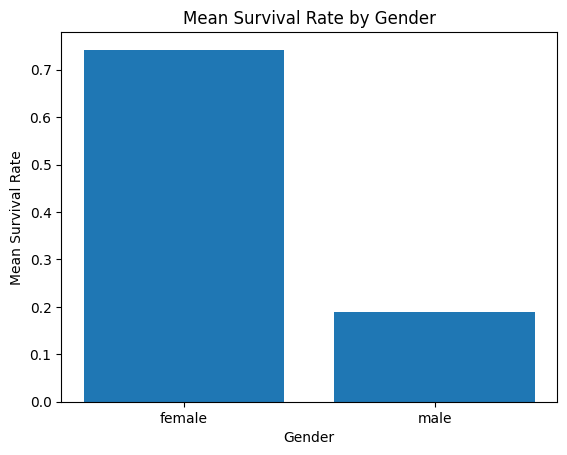

In [ ]:
#Problem - 4:

mean_survival_by_sex = ds.groupby('Sex')['Survived'].mean()
print(mean_survival_by_sex)
# visual representation is

plt.bar(mean_survival_by_sex.index, mean_survival_by_sex.values)
plt.title('Mean Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Gender')

plt.show()



Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


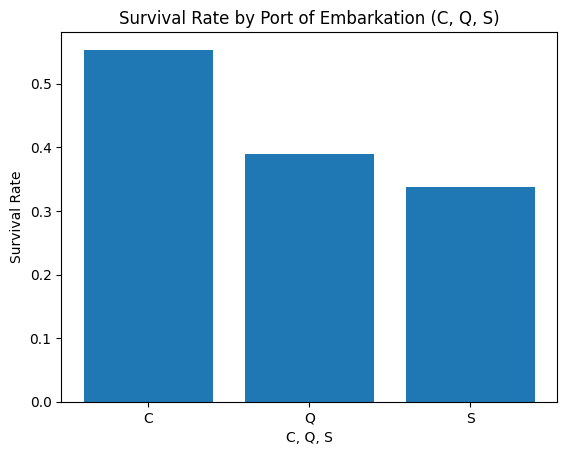

In [ ]:
#Problem - 5:

embarked_survival = ds.groupby("Embarked")["Survived"].mean()
print(embarked_survival)
plt.bar(embarked_survival.index, embarked_survival.values)

plt.xlabel("C, Q, S")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Port of Embarkation (C, Q, S)")
plt.show()